# Neural Network using tensorflow
for this model whe used some information from "https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/"

In [1]:
# import libraries
import tensorflow.keras as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras_tuner as kt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

## Load the data


In [2]:
# load data
complete_df = pd.read_csv('data/AmesHousingNN.csv')
complete_df = complete_df.drop('Unnamed: 0', axis=1)
display(complete_df)

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice.1
0,0,0,0,0,1,0,0,0,0,0,...,0.916104,0.221342,-0.358889,-0.103618,-0.286787,-0.063325,-0.089841,-0.445524,1.674241,5.332438
1,0,0,0,0,1,0,0,0,0,0,...,0.363260,-0.703563,-0.358889,-0.103618,1.844022,-0.063325,-0.089841,-0.076731,1.674241,5.021189
2,0,0,0,0,1,0,0,0,0,0,...,2.361397,-0.166522,-0.358889,-0.103618,-0.286787,-0.063325,21.884177,-0.076731,1.674241,5.235528
3,0,0,0,0,1,0,0,0,0,0,...,-0.742429,-0.703563,-0.358889,-0.103618,-0.286787,-0.063325,-0.089841,-0.814316,1.674241,5.387390
4,0,0,0,0,0,0,0,0,0,1,...,0.931900,-0.196357,-0.358889,-0.103618,-0.286787,-0.063325,-0.089841,-1.183109,1.674241,5.278525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2898,0,0,0,0,0,0,0,0,0,0,...,0.205304,-0.703563,-0.358889,-0.103618,-0.286787,-0.063325,-0.089841,-1.183109,-1.359194,5.153815
2899,0,0,0,0,1,0,0,0,0,0,...,0.552806,-0.703563,-0.358889,-0.103618,-0.286787,-0.063325,-0.089841,-0.076731,-1.359194,5.117271
2900,0,0,0,0,0,0,0,0,0,0,...,-0.110607,-0.226193,-0.358889,-0.103618,-0.286787,-0.063325,1.140704,0.292061,-1.359194,5.120574
2901,0,0,0,0,1,0,0,0,0,0,...,1.153037,-0.136686,-0.358889,-0.103618,-0.286787,-0.063325,-0.089841,-0.814316,-1.359194,5.230449


In [3]:
# split data into input and target
target = complete_df['SalePrice']
input_df = complete_df.drop('SalePrice', axis=1)

display(input_df.head())

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice.1
0,0,0,0,0,1,0,0,0,0,0,...,0.916104,0.221342,-0.358889,-0.103618,-0.286787,-0.063325,-0.089841,-0.445524,1.674241,5.332438
1,0,0,0,0,1,0,0,0,0,0,...,0.363260,-0.703563,-0.358889,-0.103618,1.844022,-0.063325,-0.089841,-0.076731,1.674241,5.021189
2,0,0,0,0,1,0,0,0,0,0,...,2.361397,-0.166522,-0.358889,-0.103618,-0.286787,-0.063325,21.884177,-0.076731,1.674241,5.235528
3,0,0,0,0,1,0,0,0,0,0,...,-0.742429,-0.703563,-0.358889,-0.103618,-0.286787,-0.063325,-0.089841,-0.814316,1.674241,5.387390
4,0,0,0,0,0,0,0,0,0,1,...,0.931900,-0.196357,-0.358889,-0.103618,-0.286787,-0.063325,-0.089841,-1.183109,1.674241,5.278525


In [4]:
# convert the pandas dataframes to numpy ndarrays
X_np = input_df.to_numpy()
y_np = target.to_numpy()

# split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, train_size=0.7, random_state=1265599650)

# find number of features
n_features = input_df.shape[1]

## Build the model
The code that is written computes its own neural network models and picks the best out of it. We continue with that model.

In [5]:
def build_model(hp):
    """
    This function computes a/the best neural network for the given data. 
    It makes a model by tuning the layers and parameters of the layers for 
    the amount of trials given in the tuner variable.
    
    source: "https://keras.io/guides/keras_tuner/getting_started/"
    """
    
    # metrics for the layers
    m1 = tf.metrics.RootMeanSquaredError()
    m2 = 'mean_absolute_percentage_error'
    
    # compute a model
    model = Sequential()
    
    # tune number of layers
    for i in range(hp.Int("numlayers", 1, 3)):
        model.add(
            Dense(
                # Tune number of units separately.
                units=hp.Int(f"units{i}", min_value=32, max_value=512, step=32),
                activation="leaky_relu"),
            )
        
    if hp.Boolean("dropout"):
        model.add(Dropout(rate=0.25))
        
    # output layer
    model.add(Dense(1, activation='leaky_relu'))
    
    model.compile(optimizer='Adam', loss=tf.metrics.mean_squared_error, metrics=[m1, m2])
    return model

tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective="val_loss",
    max_trials=20,
    executions_per_trial=3,
    overwrite=True,
    #directory="my_dir",
    #project_name="helloworld",
)

# train the models with the given data
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
best_model = tuner.get_best_models()[0]

Trial 20 Complete [00h 00m 03s]
val_loss: 0.031744941448171936

Best val_loss So Far: 0.013021527789533138
Total elapsed time: 00h 01m 16s
INFO:tensorflow:Oracle triggered exit


In [6]:
# fit the best model
best_model.fit(X_train, y_train,
          batch_size=32, epochs=200,
          validation_data=(X_test, y_test))

Epoch 1/200
64/64 [==============================] - 1s 4ms/step - loss: 0.0073 - root_mean_squared_error: 0.0853 - mean_absolute_percentage_error: 1.1358 - val_loss: 0.0144 - val_root_mean_squared_error: 0.1202 - val_mean_absolute_percentage_error: 1.3130
Epoch 2/200
64/64 [==============================] - 0s 3ms/step - loss: 0.0064 - root_mean_squared_error: 0.0801 - mean_absolute_percentage_error: 0.9872 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1079 - val_mean_absolute_percentage_error: 1.4646
Epoch 3/200
64/64 [==============================] - 0s 3ms/step - loss: 0.0065 - root_mean_squared_error: 0.0809 - mean_absolute_percentage_error: 1.0796 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0876 - val_mean_absolute_percentage_error: 1.1092
Epoch 4/200
64/64 [==============================] - 0s 3ms/step - loss: 0.0050 - root_mean_squared_error: 0.0707 - mean_absolute_percentage_error: 0.9349 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0883 - val_mean_absolu

Epoch 33/200
64/64 [==============================] - 0s 3ms/step - loss: 0.0066 - root_mean_squared_error: 0.0813 - mean_absolute_percentage_error: 1.1108 - val_loss: 0.0250 - val_root_mean_squared_error: 0.1581 - val_mean_absolute_percentage_error: 2.0335
Epoch 34/200
64/64 [==============================] - 0s 3ms/step - loss: 0.0134 - root_mean_squared_error: 0.1157 - mean_absolute_percentage_error: 1.6420 - val_loss: 0.0173 - val_root_mean_squared_error: 0.1314 - val_mean_absolute_percentage_error: 1.5331
Epoch 35/200
64/64 [==============================] - 0s 4ms/step - loss: 0.0091 - root_mean_squared_error: 0.0952 - mean_absolute_percentage_error: 1.3586 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0845 - val_mean_absolute_percentage_error: 1.1340
Epoch 36/200
64/64 [==============================] - 0s 3ms/step - loss: 0.0066 - root_mean_squared_error: 0.0812 - mean_absolute_percentage_error: 1.1267 - val_loss: 0.0124 - val_root_mean_squared_error: 0.1112 - val_mean_ab

Epoch 65/200
64/64 [==============================] - 0s 3ms/step - loss: 0.0011 - root_mean_squared_error: 0.0328 - mean_absolute_percentage_error: 0.4883 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0600 - val_mean_absolute_percentage_error: 0.8070
Epoch 66/200
64/64 [==============================] - 0s 3ms/step - loss: 8.3357e-04 - root_mean_squared_error: 0.0289 - mean_absolute_percentage_error: 0.4247 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0580 - val_mean_absolute_percentage_error: 0.7152
Epoch 67/200
64/64 [==============================] - 0s 3ms/step - loss: 0.0012 - root_mean_squared_error: 0.0351 - mean_absolute_percentage_error: 0.5211 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0681 - val_mean_absolute_percentage_error: 1.0008
Epoch 68/200
64/64 [==============================] - 0s 3ms/step - loss: 0.0021 - root_mean_squared_error: 0.0454 - mean_absolute_percentage_error: 0.6939 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0757 - val_mea

Epoch 97/200
64/64 [==============================] - 0s 3ms/step - loss: 0.0033 - root_mean_squared_error: 0.0577 - mean_absolute_percentage_error: 0.8491 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0590 - val_mean_absolute_percentage_error: 0.8128
Epoch 98/200
64/64 [==============================] - 0s 3ms/step - loss: 0.0036 - root_mean_squared_error: 0.0597 - mean_absolute_percentage_error: 0.8668 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0664 - val_mean_absolute_percentage_error: 0.8738
Epoch 99/200
64/64 [==============================] - 0s 3ms/step - loss: 0.0032 - root_mean_squared_error: 0.0564 - mean_absolute_percentage_error: 0.8018 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0650 - val_mean_absolute_percentage_error: 0.9195
Epoch 100/200
64/64 [==============================] - 0s 3ms/step - loss: 0.0050 - root_mean_squared_error: 0.0710 - mean_absolute_percentage_error: 1.0806 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0721 - val_mean_a

64/64 [==============================] - 0s 3ms/step - loss: 8.9191e-04 - root_mean_squared_error: 0.0299 - mean_absolute_percentage_error: 0.4337 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0494 - val_mean_absolute_percentage_error: 0.6105
Epoch 129/200
64/64 [==============================] - 0s 3ms/step - loss: 6.9160e-04 - root_mean_squared_error: 0.0263 - mean_absolute_percentage_error: 0.3798 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0651 - val_mean_absolute_percentage_error: 0.9612
Epoch 130/200
64/64 [==============================] - 0s 3ms/step - loss: 0.0021 - root_mean_squared_error: 0.0461 - mean_absolute_percentage_error: 0.7036 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0596 - val_mean_absolute_percentage_error: 0.8408
Epoch 131/200
64/64 [==============================] - 0s 3ms/step - loss: 0.0019 - root_mean_squared_error: 0.0439 - mean_absolute_percentage_error: 0.6637 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0775 - val_mean_abso

64/64 [==============================] - 0s 3ms/step - loss: 0.0026 - root_mean_squared_error: 0.0512 - mean_absolute_percentage_error: 0.7935 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0667 - val_mean_absolute_percentage_error: 0.9813
Epoch 160/200
64/64 [==============================] - 0s 3ms/step - loss: 0.0018 - root_mean_squared_error: 0.0419 - mean_absolute_percentage_error: 0.6140 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0550 - val_mean_absolute_percentage_error: 0.7536
Epoch 161/200
64/64 [==============================] - 0s 3ms/step - loss: 0.0012 - root_mean_squared_error: 0.0340 - mean_absolute_percentage_error: 0.5006 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0646 - val_mean_absolute_percentage_error: 0.9557
Epoch 162/200
64/64 [==============================] - 0s 3ms/step - loss: 0.0019 - root_mean_squared_error: 0.0435 - mean_absolute_percentage_error: 0.6709 - val_loss: 0.0072 - val_root_mean_squared_error: 0.0847 - val_mean_absolute_per

64/64 [==============================] - 0s 3ms/step - loss: 0.0034 - root_mean_squared_error: 0.0583 - mean_absolute_percentage_error: 0.8761 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0709 - val_mean_absolute_percentage_error: 0.9752
Epoch 191/200
64/64 [==============================] - 0s 3ms/step - loss: 0.0023 - root_mean_squared_error: 0.0475 - mean_absolute_percentage_error: 0.6959 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0733 - val_mean_absolute_percentage_error: 0.9836
Epoch 192/200
64/64 [==============================] - 0s 3ms/step - loss: 0.0021 - root_mean_squared_error: 0.0455 - mean_absolute_percentage_error: 0.6690 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0534 - val_mean_absolute_percentage_error: 0.7106
Epoch 193/200
64/64 [==============================] - 0s 3ms/step - loss: 9.5155e-04 - root_mean_squared_error: 0.0308 - mean_absolute_percentage_error: 0.4580 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0581 - val_mean_absolute

## Visualizing the results
Now that the model is actually build, we can visualize the outcome.

In [7]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               138752    
                                                                 
 dense_1 (Dense)             (None, 352)               180576    
                                                                 
 dense_2 (Dense)             (None, 1)                 353       
                                                                 
Total params: 319,681
Trainable params: 319,681
Non-trainable params: 0
_________________________________________________________________


In [8]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
numlayers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': None}
units0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
dropout (Boolean)
{'default': False, 'conditions': []}
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}


In [9]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
numlayers: 2
units0: 512
dropout: False
units1: 352
units2: 320
Score: 0.013021527789533138
Trial summary
Hyperparameters:
numlayers: 2
units0: 288
dropout: False
units1: 64
units2: 288
Score: 0.0139717028165857
Trial summary
Hyperparameters:
numlayers: 2
units0: 288
dropout: False
units1: 32
units2: 384
Score: 0.014358695286015669
Trial summary
Hyperparameters:
numlayers: 2
units0: 128
dropout: False
units1: 384
units2: 384
Score: 0.017014496338864166
Trial summary
Hyperparameters:
numlayers: 1
units0: 384
dropout: False
units1: 320
units2: 160
Score: 0.017363722436130047
Trial summary
Hyperparameters:
numlayers: 3
units0: 128
dropout: False
units1: 128
units2: 32
Score: 0.018220352319379646
Trial summary
Hyperparameters:
numlayers: 2
units0: 224
dropout: False
units1: 128
units2: 384
Score: 0.019426856189966202
Trial summary
Hyperparameters:


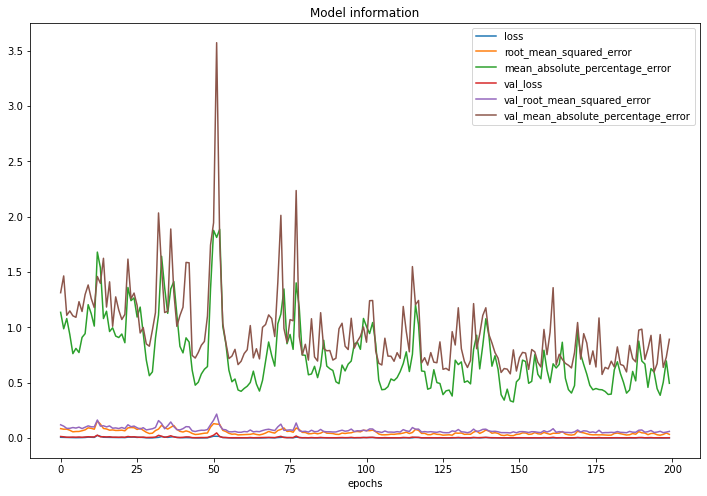

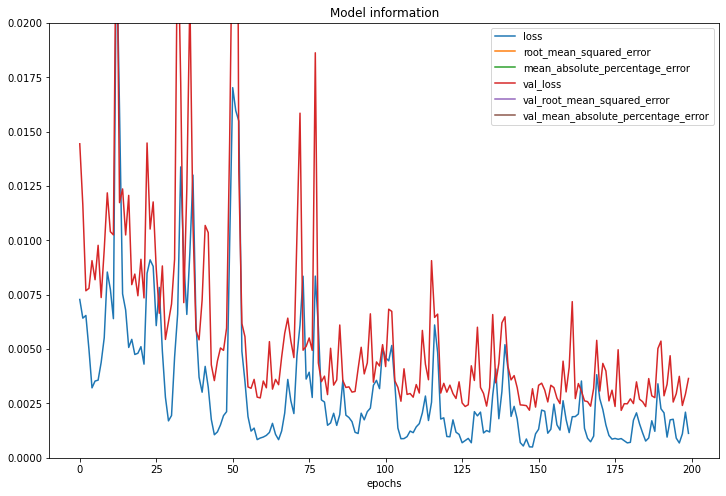

In [10]:
loss_df = pd.DataFrame(best_model.history.history)

loss_df.plot(figsize=(12,8))
plt.title("Model information")
plt.xlabel("epochs")
plt.show()

loss_df.plot(figsize=(12,8))
plt.ylim((0,0.02))
plt.title("Model information")
plt.xlabel("epochs")
plt.show()

In [16]:
from sklearn import metrics

y_pred = best_model.predict(X_test)
var_score = metrics.explained_variance_score(y_test,y_pred)
# compute the accuracy of the model 
print('Variance score:', var_score)
print(10**(100-var_score*100))

Variance score: 0.9175970021320958
173900082.00101903


### Model 2

In [12]:
#### verbeterpunten:
# validation data gebruiken                           
# k folds
# andere metrics voor aflezen                     check
# adam vs andere andere sgd methods testen        check, Adam ziet er het best uit
# hidden layers toevoegen 
# dropout layers toevoegen                        dropout layers hebben geen positief effect op het model
# aantal nodes per layer aanpassen
# batchsize aanpassen (32, 64 of 128)             check, 32 lijkt het beste te werken
# aantal epochs                                   check, na 20 epochs lijkt het model het meest te leren, daarna improved het niet heel veel meer                                     
# onze loss plotten                               check
